# Dissimilarity based on multiple-point histogram (MPH) analysis
Multiple-point histogram are based on pattern recognition. Patterns are delimited by a search window. One can count unique patterns or try to identify cluster representatives of patterns (what we do here for the continuous case). 
In addition, voxets can be easily upscaled which allows MPH analysis of potentially large scale features with a small research window at high level of upscaling.

In [1]:
# import modules
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from sklearn import manifold
import pickle
from uncertaintyIndicators import dist_kmeans_mph

picklefilenamemph = "./pickledata/testing-model-subset-mph.pickle"
picklefilenamedata = "./pickledata/testing-model-subset.pickle"
sample_num1 = 0 # 0/3 or 8/9
sample_num2 = 3
myseed = 65432
n_clusters=10
nmax_patterns = int(1E4)
pattern2Dsize = np.asarray([3,4])
pattern3Dsize = np.asarray([1,2,3])

# import data
with open(picklefilenamedata, 'rb') as f:
    [grv_all,mag_all,mod_all,rho_all,sus_all,cmap,samples_ix] = pickle.load(f)

# get dimensions
[nz,ny,nx,nbsamples]=mod_all.shape
nsamples = len(samples_ix)

# maximum number of upscaling levels
max2Dlevels = np.min([np.floor(np.log(ny/(pattern2Dsize[0]+n_clusters**(1/2))) / np.log(2) ),
                      np.floor(np.log(nx/(pattern2Dsize[1]+n_clusters**(1/2))) / np.log(2) )]).astype(int)
freedomX = nx/2**(max2Dlevels+1)-pattern2Dsize[1]
freedomY = ny/2**(max2Dlevels+1)-pattern2Dsize[0]
if freedomX*freedomY>=n_clusters:
    max2Dlevels +=1
    
max3Dlevels = np.min([np.floor(np.log(nz/(pattern3Dsize[0]+n_clusters**(1/3)))/np.log(2)),
                      np.floor(np.log(ny/(pattern3Dsize[1]+n_clusters**(1/3)))/np.log(2)),
                      np.floor(np.log(nx/(pattern3Dsize[2]+n_clusters**(1/3)))/np.log(2))]).astype(int)
freedomX = nx/2**(max3Dlevels+1)-pattern3Dsize[2]
freedomY = ny/2**(max3Dlevels+1)-pattern3Dsize[1]
freedomZ = nz/2**(max3Dlevels+1)-pattern3Dsize[0]
if freedomX*freedomY*freedomZ>=n_clusters:
    max3Dlevels +=1


## 2D case
For each level of upscaling, 2 plots are rendered. One uses an independent colorscale for each pattern, the other one uses a shared colorscale.

03-Jun-2021 (23:34:58) - COMPUTING k-means clustered MPH BASED DIST GRV START
Level 0
Number of possible patterns: 39006
Number of sub-sampled patterns: 10000
Distance component: 0.7122076924901675


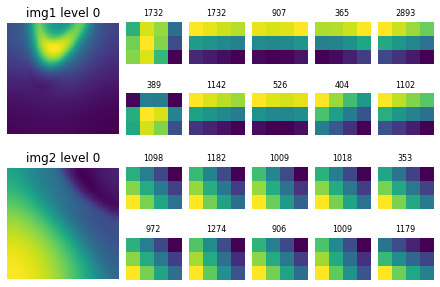

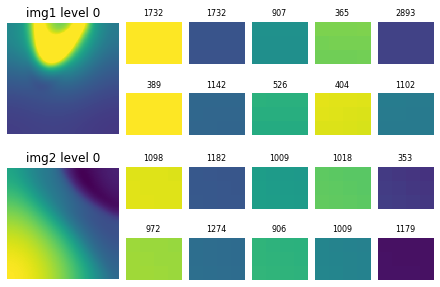

Level 1
Number of possible patterns: 9506
Number of sub-sampled patterns: 9506
Distance component: 0.7701534890463889


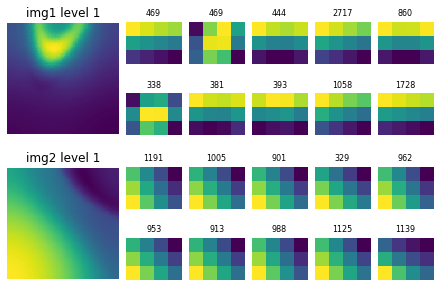

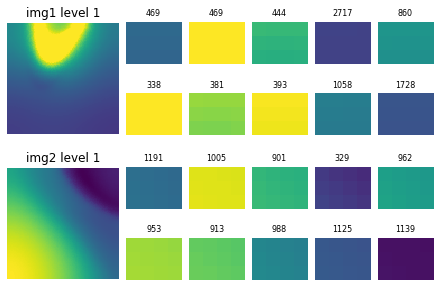

Level 2
Number of possible patterns: 2256
Number of sub-sampled patterns: 2256
Distance component: 1.0042450561321024


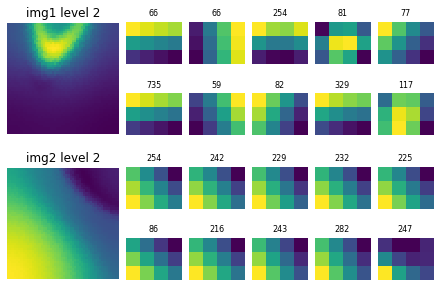

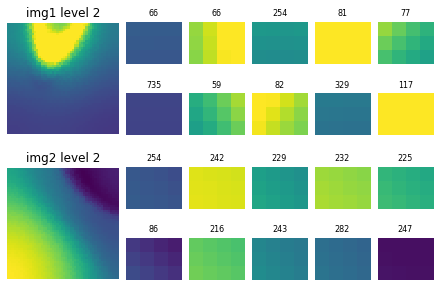

Level 3
Number of possible patterns: 506
Number of sub-sampled patterns: 506
Distance component: 1.195472631668579


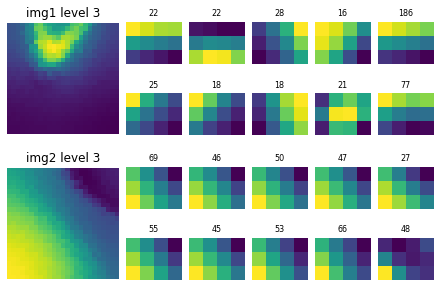

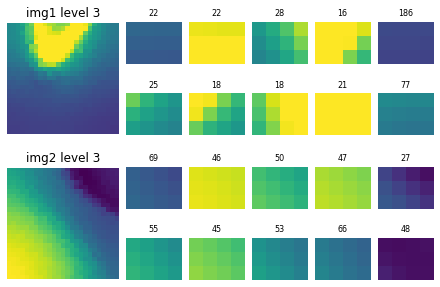

Level 4
Number of possible patterns: 90
Number of sub-sampled patterns: 90
Distance component: 1.3631333549239708


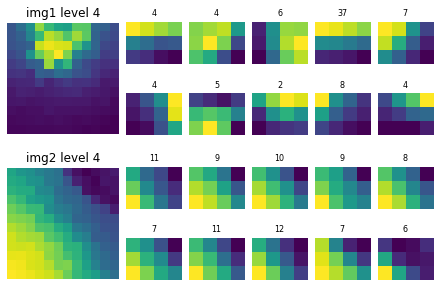

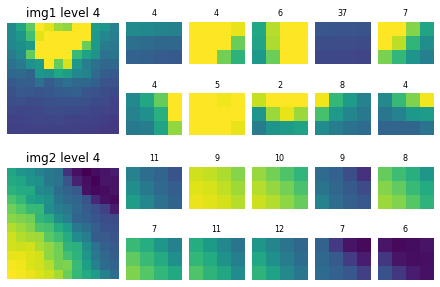

Level 5
Number of possible patterns: 12
Number of sub-sampled patterns: 12
Distance component: 1.7216706055940414


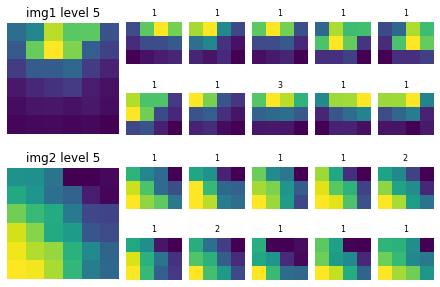

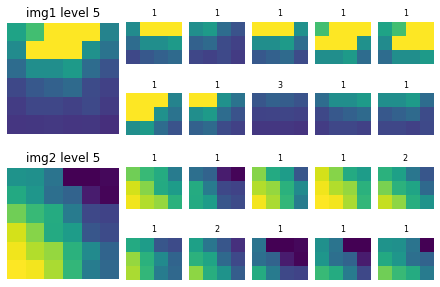

03-Jun-2021 (23:35:23) - COMPUTING k-means clustered MPH BASED DIST GRV END


In [2]:
img1 = grv_all[:,:,sample_num1] # for illustration, we consider the magnetic response of random sample #9
img2 = grv_all[:,:,sample_num2] # for illustration, we consider the magnetic response of random sample #2

n_levels=max2Dlevels+1
patternsize=pattern2Dsize

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING k-means clustered MPH BASED DIST GRV START")
d = dist_kmeans_mph(img1,img2,n_levels,patternsize,n_clusters,nmax_patterns,myseed,plot=True,verb=True)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING k-means clustered MPH BASED DIST GRV END")

## 3D case
For each level of upscaling, 2 plots are rendered. One uses an independent colorscale for each pattern, the other one uses a shared colorscale.

In [3]:
img1 = rho_all[:,:,:,sample_num1] # for illustration, we consider the magnetic response of random sample #9
img2 = rho_all[:,:,:,sample_num2] # for illustration, we consider the magnetic response of random sample #2

n_levels=max3Dlevels
patternsize=pattern3Dsize

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING k-means clustered MPH BASED DIST DENSITY START")
d = dist_kmeans_mph(img1,img2,n_levels,patternsize,n_clusters,nmax_patterns,myseed,plot=False,verb=True)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING k-means clustered MPH BASED DIST DENSITY END")

03-Jun-2021 (23:35:23) - COMPUTING k-means clustered MPH BASED DIST DENSITY START
Level 0
Number of possible patterns: 7880400
Number of sub-sampled patterns: 10000
Distance component: 0.09057828836858789
Level 1
Number of possible patterns: 970200
Number of sub-sampled patterns: 10000
Distance component: 0.0823195948867086
Level 2
Number of possible patterns: 117600
Number of sub-sampled patterns: 10000
Distance component: 0.07727302955943527
Level 3
Number of possible patterns: 13800
Number of sub-sampled patterns: 10000
Distance component: 0.08838945976123957
Level 4
Number of possible patterns: 1320
Number of sub-sampled patterns: 1320
Distance component: 0.08237407677229018
Level 5
Number of possible patterns: 120
Number of sub-sampled patterns: 120
Distance component: 0.08525901057139731
03-Jun-2021 (23:35:27) - COMPUTING k-means clustered MPH BASED DIST DENSITY END


## Compute for all pair of voxets<span style='color:red'>\*</span>
<span style='color:red'>**\*WARNING: IT COULD TAKE AROUND 30 MINUTES. PRECOMPUTED RESULTS ALREADY AVAILABLE IN THE PICKLE FOLDER** </span>

In [ ]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING MULTIPLE-POINT HISTOGRAM BASED DIST ALL START")

dist_mph_mag = np.zeros((nsamples,nsamples))
dist_mph_grv = np.zeros((nsamples,nsamples))
dist_mph_mod = np.zeros((nsamples,nsamples))
dist_mph_rho = np.zeros((nsamples,nsamples))
dist_mph_sus = np.zeros((nsamples,nsamples))

k=0
for i in range(nsamples):
    for j in range(i):
        k+=1
        print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+'k = '+str(k)+' - i = '+str(i)+' j = ',str(j))
        dist_mph_mag[i,j] = dist_kmeans_mph(mag_all[:,:,i],mag_all[:,:,j],max2Dlevels,pattern2Dsize,n_clusters,nmax_patterns,myseed)
        dist_mph_grv[i,j] = dist_kmeans_mph(grv_all[:,:,i],grv_all[:,:,j],max2Dlevels,pattern2Dsize,n_clusters,nmax_patterns,myseed)
        dist_mph_mod[i,j] = dist_kmeans_mph(mod_all[:,:,:,i],mod_all[:,:,:,j],max3Dlevels,pattern3Dsize,n_clusters,nmax_patterns,myseed)
        dist_mph_rho[i,j] = dist_kmeans_mph(rho_all[:,:,:,i],rho_all[:,:,:,j],max3Dlevels,pattern3Dsize,n_clusters,nmax_patterns,myseed)
        dist_mph_sus[i,j] = dist_kmeans_mph(sus_all[:,:,:,i],sus_all[:,:,:,j],max3Dlevels,pattern3Dsize,n_clusters,nmax_patterns,myseed)
        dist_mph_mag[j,i] = dist_mph_mag[i,j]
        dist_mph_grv[j,i] = dist_mph_grv[i,j]
        dist_mph_mod[j,i] = dist_mph_mod[i,j]
        dist_mph_rho[j,i] = dist_mph_rho[i,j]
        dist_mph_sus[j,i] = dist_mph_sus[i,j]

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING MULTIPLE-POINT HISTOGRAM BASED DIST ALL END")

## Some Multi-Dimensional Scaling plots<span style='color:red'>\*</span>
<span style='color:red'>**\*if all pairs of distances have been computed** </span>

In [ ]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING 2D MDS REPRESENTATION START")

mds = manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=myseed,
                    dissimilarity="precomputed", n_jobs=1)

mdspos_mag = mds.fit(dist_mph_mag).embedding_
mdspos_grv = mds.fit(dist_mph_grv).embedding_
mdspos_mod = mds.fit(dist_mph_mod).embedding_
mdspos_rho = mds.fit(dist_mph_rho).embedding_
mdspos_sus = mds.fit(dist_mph_sus).embedding_

fig = plt.figure(1)
ax = plt.axes([0., 0., 1., 1.])
s = 100
plt.scatter(mdspos_mag[:, 0], mdspos_mag[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='mag', marker='o')
plt.scatter(mdspos_grv[:, 0], mdspos_grv[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='grv', marker='^')
plt.scatter(mdspos_mod[:, 0], mdspos_mod[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='litho', marker='v')
plt.scatter(mdspos_rho[:, 0], mdspos_rho[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='rho', marker='<')
plt.scatter(mdspos_sus[:, 0], mdspos_sus[:, 1], c=np.arange(nsamples),cmap='tab10', s=s, lw=0, label='sus. mag.', marker='>')
plt.legend(scatterpoints=1, loc='best', shadow=False)
ax.set_title('2D Multi-Dimensional Scaling Representation of (dis-)similarities')
plt.show()

ix=np.tril_indices(nsamples,k=-1)
df= pd.DataFrame({'mag':dist_mph_mag[ix], 'grv':dist_mph_grv[ix], 'litho':dist_mph_mod[ix], 'rho':dist_mph_rho[ix], 'sus':dist_mph_sus[ix]})
g = sns.PairGrid(df)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING 2D MDS REPRESENTATION END")

## Save indicators<span style='color:red'>\*</span>
<span style='color:red'>**\*if all pairs of distances have been computed** </span>

In [ ]:
with open(picklefilenamemph, 'wb') as f:
    pickle.dump([dist_mph_mag,dist_mph_grv,dist_mph_mod,dist_mph_rho,dist_mph_sus,
                  mdspos_mag,mdspos_grv,mdspos_mod,mdspos_rho,mdspos_sus], f)